In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st

%matplotlib inline
matplotlib.style.use('ggplot')

In [108]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/telco_customer.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## On average, which payment method has the largest monthly charge per customer?

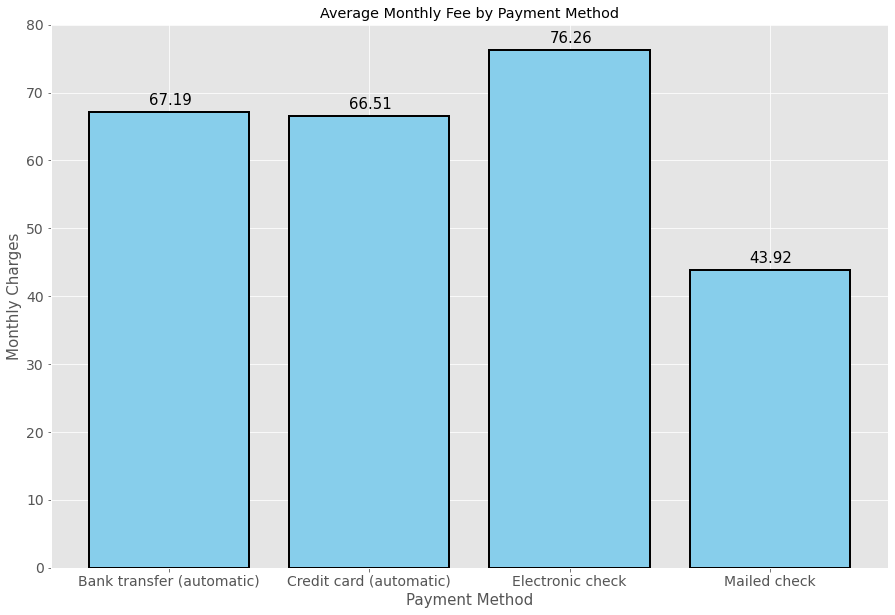

In [6]:
dv = df.copy()
dv = dv.groupby(['PaymentMethod'])['MonthlyCharges'].mean().reset_index()

x = dv['PaymentMethod']
y = dv['MonthlyCharges']

plt.figure(figsize=(15,10))
bar = plt.bar(x=x, height=y, data =dv,
              color='skyblue',
              edgecolor='black',
              linewidth=2)

plt.title('Average Monthly Fee by Payment Method')

plt.xlabel('Payment Method', fontsize=15)
plt.ylabel('Monthly Charges', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=14)
x_nuumbers = range(len(x))
for i in x_nuumbers:
    plt.text(x=x_nuumbers[i]-0.1, y=y[i]+1, s=round(y[i],2), size=15)

Based on the plot above, it can be concluded that the average monthly fee based on the most widely used payment method is Electronic check of 76.26

## How is the number of customers seen from the tenure group?

Tenure group:
- low_tenure: Users with tenure < 21 months
- medium_tenure: User with tenure 21 - 40 months
- high_tenure: User with tenure > 40 months

In [7]:
df2 = df.copy()
df2['tenure_segment'] = np.where(df2['tenure'] > 40, 'High', 
                                  np.where((df2['tenure'] >= 21) & (df2['tenure'] <= 40) , 'Medium', 'Low'))
df2

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_segment
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Low
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,Medium
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Low
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,High
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,Medium
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,High
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,Low
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,Low


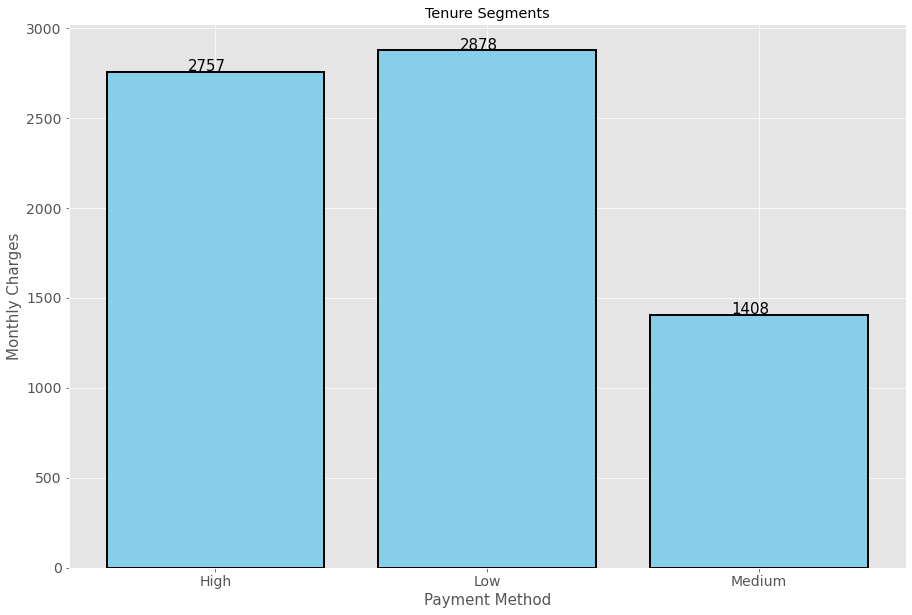

In [8]:
df2 = df2.groupby(['tenure_segment'])['MonthlyCharges'].count().reset_index()

x = df2['tenure_segment']
y = df2['MonthlyCharges']

plt.figure(figsize=(15,10))
bar = plt.bar(x=x, height=y, data =df2,
              color='skyblue',
              edgecolor='black',
              linewidth=2)

plt.title('Tenure Segments')

plt.xlabel('Payment Method', fontsize=15)
plt.ylabel('Monthly Charges', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=14)

x_nuumbers = range(len(x))
for i in x_nuumbers:
    plt.text(x=x_nuumbers[i]-0.1, y=y[i]+2, s=round(y[i],2), size=15)

Based on the plot above, it can be concluded that the tenure group that has the most number of customers is the tenure group which has the lowest amounting to 2878.

## Do most Senior Citizens subscribe to Phone Service?

In [9]:
df3 = df.copy()
df3 = df3.groupby(['SeniorCitizen', 'PhoneService'])['customerID'].nunique().reset_index(name='UniqueCustomer')
df31 = df.groupby(['SeniorCitizen'])['customerID'].nunique().reset_index(name='AllUniqueCustomer')

In [10]:
df12 = df3.merge(df31, how = 'inner', on='SeniorCitizen')
df12['percentage'] = round(df12['UniqueCustomer']*100.0/df12['AllUniqueCustomer'], 2)
df12

,SeniorCitizen,PhoneService,UniqueCustomer,AllUniqueCustomer,percentage
0,0,No,578,5901,9.79
1,0,Yes,5323,5901,90.21
2,1,No,104,1142,9.11
3,1,Yes,1038,1142,90.89


<AxesSubplot:xlabel='PhoneService', ylabel='percentage'>

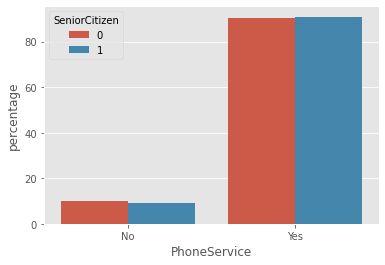

In [11]:
sns.barplot(x= 'PhoneService', y='percentage', hue='SeniorCitizen', data=df12)

From the plot above, it can be concluded that the percentage of senior citizens who use telephone services is higher than that of senior citizens who do not use telephone services. The percentage of senior citizens who use telephone services is more than 80%.

## How is the Distribution of Total Charge?

In [12]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
df.dropna()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


<Figure size 720x576 with 0 Axes>

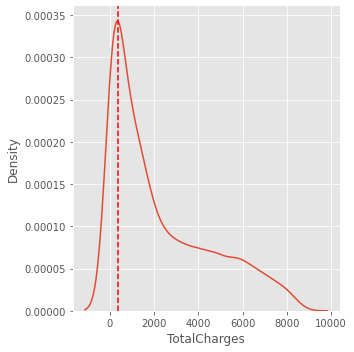

In [14]:
plt.figure(figsize=(10,8))
sns.displot(df['TotalCharges'], kind='kde', height=5)

plt.axvline(350, linestyle='--', color='red')

From the plot above, it can be concluded that the distribution of the highest total costs is at 350.

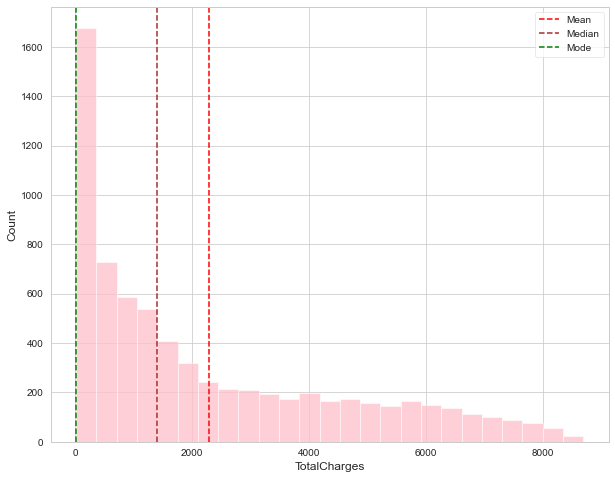

In [15]:
plt.figure(figsize=(10,8))
data = df['TotalCharges']

meanX = df['TotalCharges'].mean()
medianX = df['TotalCharges'].median()
modeX = df['TotalCharges'].mode()[0]

sns.set_style('whitegrid')

plt.axvline(meanX, color = 'red', linestyle = '--', label = 'Mean')
plt.axvline(medianX, color = 'brown', linestyle = '--', label = 'Median')
plt.axvline(modeX, color = 'green', linestyle = '--', label = 'Mode')

sns.histplot(x=data, color = 'pink')
plt.legend()

In [19]:
print(meanX)
print(medianX)
print(modeX)

2283.3004408418697
1397.475
20.2


From the plot above, it can be concluded that:
- the most frequently total cost that appeaars is 20.2
- average total cost is 2283.3 
- median total cost is 1397.5

## Do customers who have high monthly charges tend to churn?

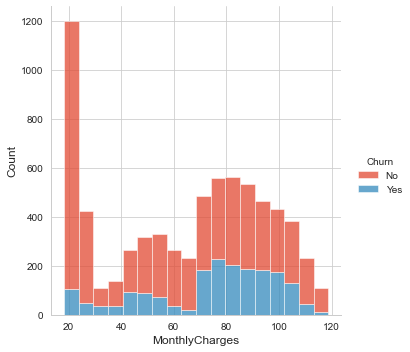

In [21]:
sns.displot(x='MonthlyCharges', hue='Churn', data=df, multiple='stack')

Based on the plot above, it can be concluded that the high monthly cost does not affect the customer to churn and instead the customer who has the most expensive monthly fee has the least number of customer churn. It can also be seen that, low monthly fees have the most number of non-churn customers with a very large gap from other monthly costs.

## How does having partners & dependents affect the level of customer churn?

In [22]:
df['merge'] = df['Partner'] +'-'+ df['Dependents']
df['merge'].value_counts()

No-No      3280
Yes-Yes    1749
Yes-No     1653
No-Yes      361
Name: merge, dtype: int64

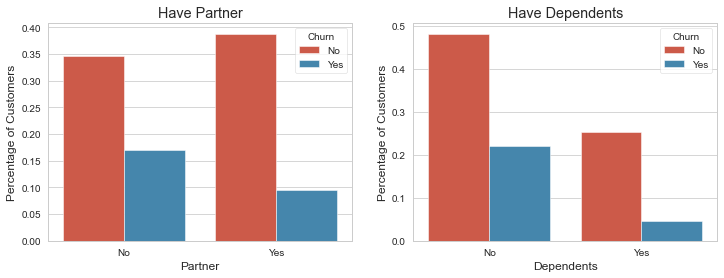

In [23]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title('Have Partner')
axis[1].set_title('Have Dependents')
axis_y = 'Percentage of Customers'

#Barplot partner
partner = df.groupby('Partner')['Churn'].value_counts()/len(df)
partner = partner.to_frame().rename({'Churn': axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Partner', y= axis_y, hue='Churn', data=partner, ax=axis[0])

#Barplot dependents
dependents = df.groupby('Dependents')['Churn'].value_counts()/len(df)
dependents = dependents.to_frame().rename({'Churn': axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Dependents', y= axis_y, hue='Churn', data=dependents, ax=axis[1])

From the plot above, it can be concluded that customers who have a spouse and dependents actually have a lower percentage of churn than customers who do not have a spouse and dependents. There are some points:
- Customers who do not have dependents have the largest percentage of churn
- Customers with the lowest percentage of churn are customers who have dependents.

## See the Relationship Between Payment Method, Customer ID, and Churn Features

In [24]:
df7= df.copy()
df7.iloc[:, [0,17,20]].head()

,customerID,PaymentMethod,Churn
0,7590-VHVEG,Electronic check,No
1,5575-GNVDE,Mailed check,No
2,3668-QPYBK,Mailed check,Yes
3,7795-CFOCW,Bank transfer (automatic),No
4,9237-HQITU,Electronic check,Yes


In [25]:
d7 = df.copy()
d7 = df.groupby(['PaymentMethod', 'Churn'])['customerID'].nunique().reset_index(name='Count Customer')
d7

,PaymentMethod,Churn,Count Customer
0,Bank transfer (automatic),No,1286
1,Bank transfer (automatic),Yes,258
2,Credit card (automatic),No,1290
3,Credit card (automatic),Yes,232
4,Electronic check,No,1294
5,Electronic check,Yes,1071
6,Mailed check,No,1304
7,Mailed check,Yes,308


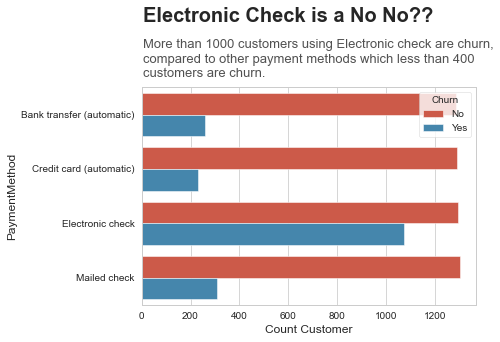

In [50]:
sns.barplot(x='Count Customer', y='PaymentMethod', hue='Churn', data=d7)

plt.text(x=5, y=-1.7, s='Electronic Check is a No No??', fontsize=20, weight='bold')
plt.text(x=5, y=-0.7, s='More than 1000 customers using Electronic check are churn,\ncompared to other payment methods which less than 400 \ncustomers are churn.', fontsize=13, alpha=0.8)
plt.show()